In [1]:
import pandas as pd


In [3]:
df=pd.read_csv('../data/cleaned/merged_atm_data.csv')

In [4]:
df.set_index('date', inplace=True)

In [12]:
df.head()

,Unnamed: 0,atm_id,date,amount,city,region,day_off_description,is_holiday
0,0,1,2009-01-02,17200.0,casablanca,casablanca-settat,normal day,0
1,1,2,2009-01-02,163300.0,casablanca,casablanca-settat,normal day,0
2,2,3,2009-01-02,306900.0,rabat,rabat-sale-kenitra,normal day,0
3,3,4,2009-01-02,231400.0,rabat,rabat-sale-kenitra,normal day,0
4,4,5,2009-01-02,241000.0,kenitra,rabat-sale-kenitra,normal day,0


In [13]:
df=df.drop(columns=['Unnamed: 0'])

In [14]:
df.isna().sum()

atm_id                 0
date                   0
amount                 0
city                   0
region                 0
day_off_description    0
is_holiday             0
dtype: int64

In [15]:
df.dtypes

atm_id                   int64
date                    object
amount                 float64
city                    object
region                  object
day_off_description     object
is_holiday               int64
dtype: object

In [16]:
df['date']=pd.to_datetime(df['date'])

In [17]:
df.set_index('date', inplace=True)

In [18]:
df.head()

,atm_id,amount,city,region,day_off_description,is_holiday
date,,,,,,
2009-01-02,1,17200.0,casablanca,casablanca-settat,normal day,0
2009-01-02,2,163300.0,casablanca,casablanca-settat,normal day,0
2009-01-02,3,306900.0,rabat,rabat-sale-kenitra,normal day,0
2009-01-02,4,231400.0,rabat,rabat-sale-kenitra,normal day,0
2009-01-02,5,241000.0,kenitra,rabat-sale-kenitra,normal day,0


In [19]:
df.shape

(8929254, 6)

In [20]:
df.describe()

,atm_id,amount,is_holiday
count,8.929254e+06,8.929254e+06,8.929254e+06
mean,8.910856e+02,1.534035e+05,4.122293e-02
std,6.672489e+02,1.144742e+05,1.988054e-01
min,1.000000e+00,9.800000e+00,0.000000e+00
25%,2.740000e+02,7.720000e+04,0.000000e+00
50%,8.260000e+02,1.294000e+05,0.000000e+00
75%,1.411000e+03,1.991000e+05,0.000000e+00
max,2.551000e+03,4.569538e+06,1.000000e+00


In [21]:
df.columns

Index(['atm_id', 'amount', 'city', 'region', 'day_off_description',
       'is_holiday'],
      dtype='object')

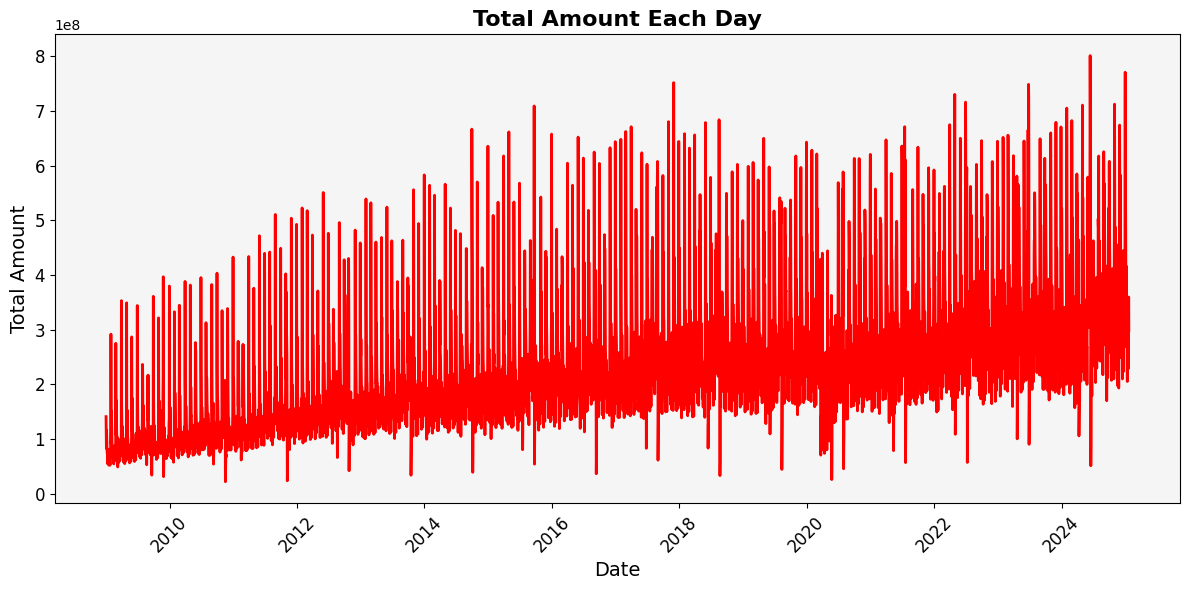

In [22]:
import matplotlib.pyplot as plt
daily_amount = df.groupby('date')['amount'].sum()
plt.figure(figsize=(12,6))

plt.plot(daily_amount.index, daily_amount.values, color='r', linewidth=2, linestyle='-')
plt.title('Total Amount Each Day', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()


In [23]:
df.head()

,atm_id,amount,city,region,day_off_description,is_holiday
date,,,,,,
2009-01-02,1,17200.0,casablanca,casablanca-settat,normal day,0
2009-01-02,2,163300.0,casablanca,casablanca-settat,normal day,0
2009-01-02,3,306900.0,rabat,rabat-sale-kenitra,normal day,0
2009-01-02,4,231400.0,rabat,rabat-sale-kenitra,normal day,0
2009-01-02,5,241000.0,kenitra,rabat-sale-kenitra,normal day,0


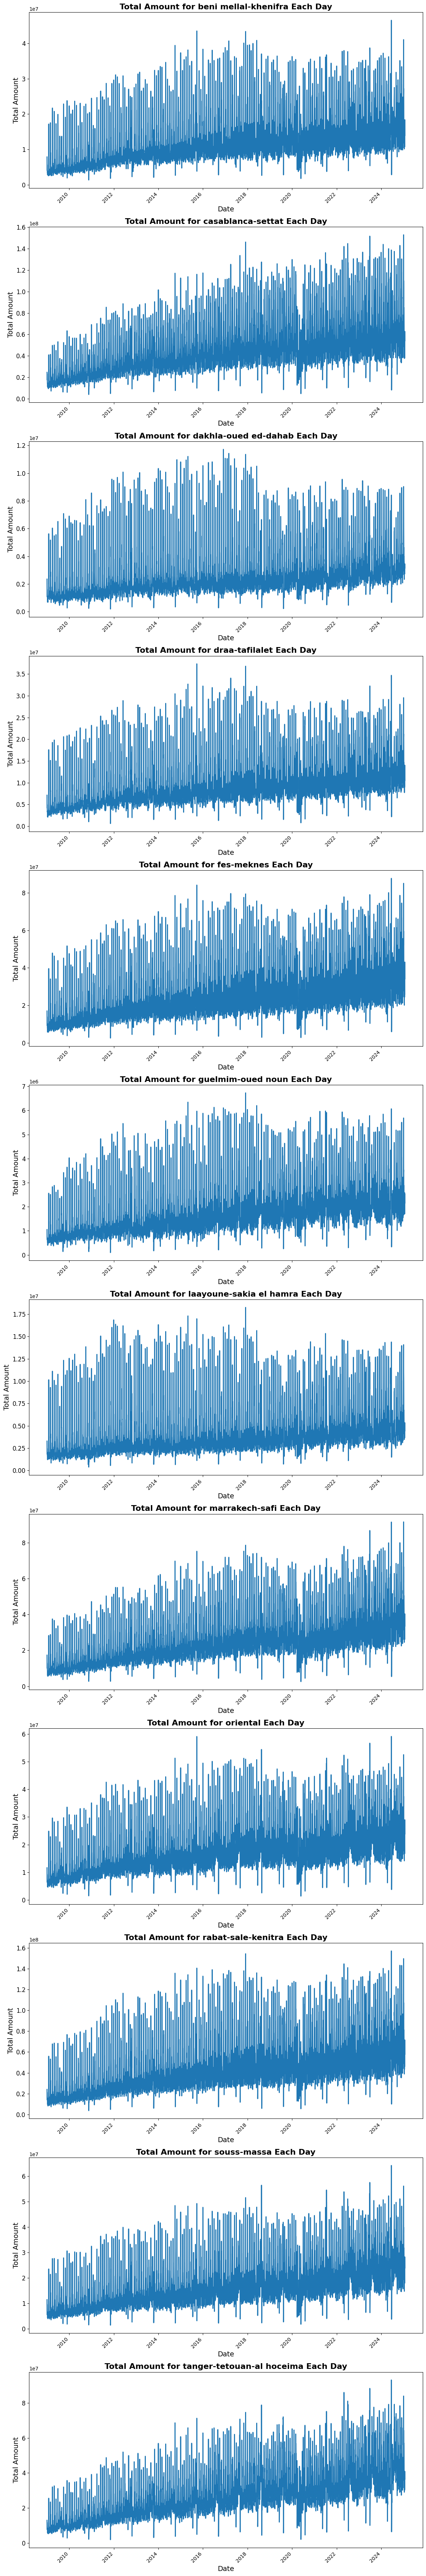

In [24]:
import matplotlib.pyplot as plt
daily_amount_region = df.groupby(['date', 'region'])['amount'].sum().unstack()

fig, axes = plt.subplots(len(daily_amount_region.columns), 1, figsize=(12, 6 * len(daily_amount_region.columns)))

for i, region in enumerate(daily_amount_region.columns):
    daily_amount_region[region].plot(kind='line', linewidth=2, ax=axes[i])
    axes[i].set_title(f'Total Amount for {region} Each Day', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Date', fontsize=14)
    axes[i].set_ylabel('Total Amount', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()



In [25]:
df.head()

,atm_id,amount,city,region,day_off_description,is_holiday
date,,,,,,
2009-01-02,1,17200.0,casablanca,casablanca-settat,normal day,0
2009-01-02,2,163300.0,casablanca,casablanca-settat,normal day,0
2009-01-02,3,306900.0,rabat,rabat-sale-kenitra,normal day,0
2009-01-02,4,231400.0,rabat,rabat-sale-kenitra,normal day,0
2009-01-02,5,241000.0,kenitra,rabat-sale-kenitra,normal day,0


In [26]:
atm_count_per_region = df.groupby('region')['atm_id'].nunique().sort_values(ascending=False)
print(atm_count_per_region)

region
casablanca-settat            472
rabat-sale-kenitra           364
tanger-tetouan-al hoceima    289
marrakech-safi               247
fes-meknes                   229
oriental                     219
souss-massa                  166
beni mellal-khenifra         111
draa-tafilalet                63
laayoune-sakia el hamra       26
dakhla-oued ed-dahab          22
guelmim-oued noun             10
Name: atm_id, dtype: int64


In [27]:
total_amount_per_region = df.groupby('region')['amount'].sum().sort_values(ascending=False)
print(total_amount_per_region)

region
casablanca-settat            2.770541e+11
rabat-sale-kenitra           2.575172e+11
tanger-tetouan-al hoceima    1.614601e+11
marrakech-safi               1.492990e+11
fes-meknes                   1.464871e+11
oriental                     1.061696e+11
souss-massa                  1.015341e+11
beni mellal-khenifra         6.884325e+10
draa-tafilalet               5.254341e+10
laayoune-sakia el hamra      2.364058e+10
dakhla-oued ed-dahab         1.495064e+10
guelmim-oued noun            1.027988e+10
Name: amount, dtype: float64


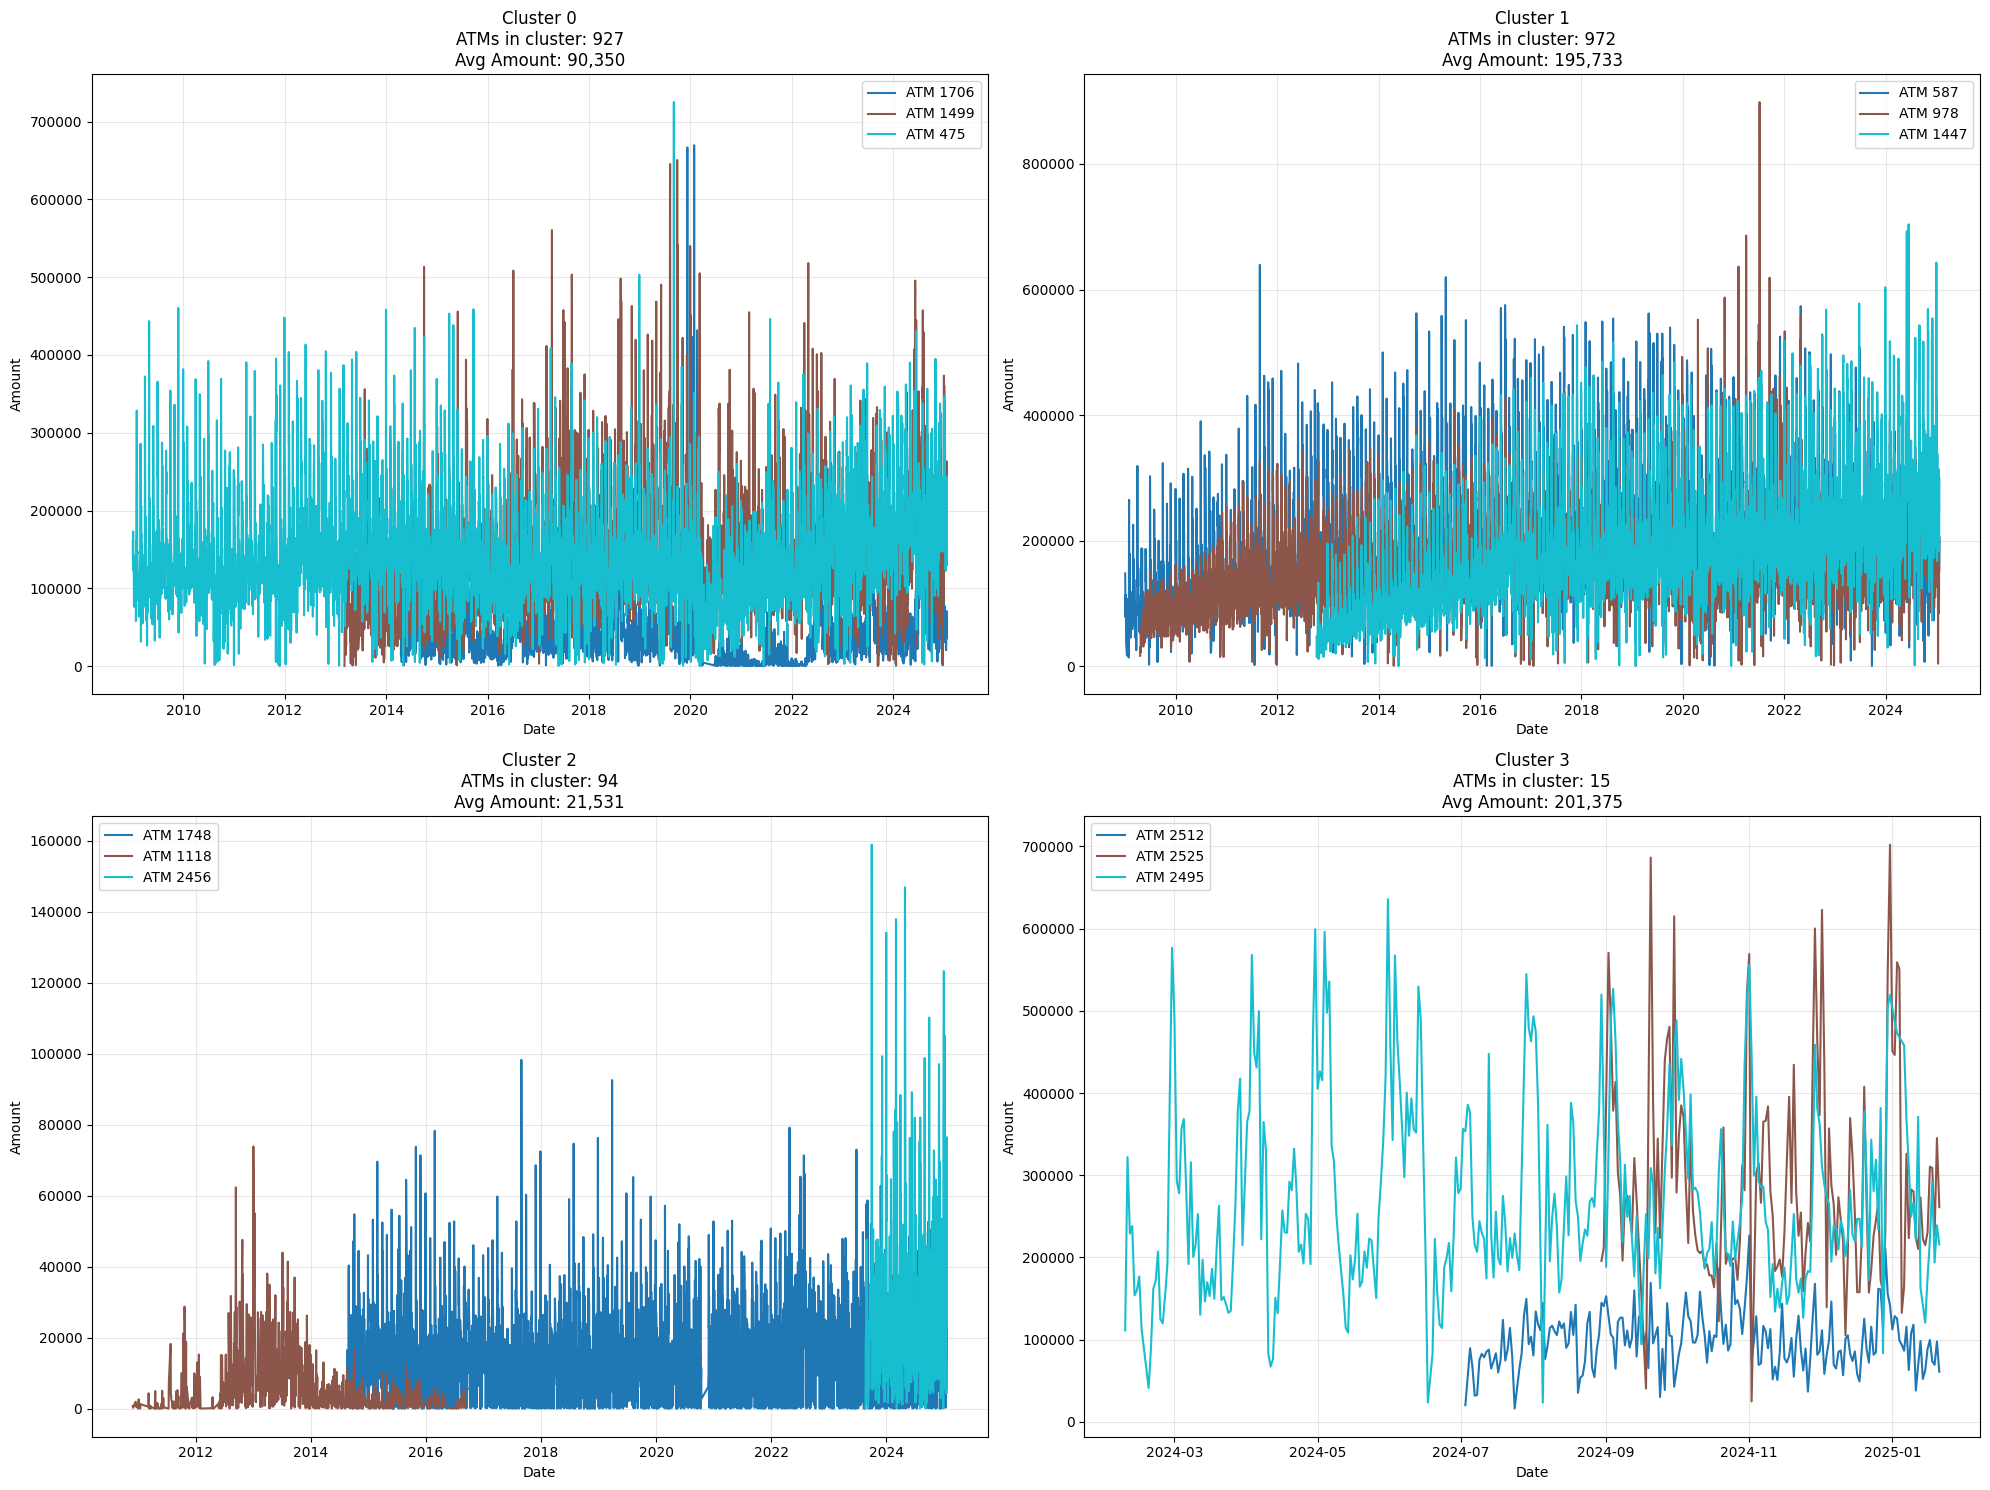

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_atm_patterns(data, n_clusters=4, n_samples_per_cluster=3):
    if 'date' in data.columns:
        data = data.set_index('date')
    
    atm_features = data.groupby('atm_id').agg({
        'amount': ['mean', 'std', 'max', 'min'],
        'is_holiday': 'mean'  
    }).fillna(0)
    
    atm_features.columns = ['_'.join(col).strip() for col in atm_features.columns.values]
    
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(atm_features)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    
    atm_features['cluster'] = clusters
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.ravel()
    
    colors = plt.cm.tab10(np.linspace(0, 1, n_samples_per_cluster))
    
    for cluster in range(n_clusters):
        cluster_atms = atm_features[atm_features['cluster'] == cluster].index
        sample_atms = np.random.choice(cluster_atms, 
                                     size=min(n_samples_per_cluster, len(cluster_atms)), 
                                     replace=False)
        
        for idx, atm_id in enumerate(sample_atms):
            atm_data = data[data['atm_id'] == atm_id].sort_index()
            axes[cluster].plot(atm_data.index, atm_data['amount'], 
                             color=colors[idx],
                             label=f'ATM {atm_id}')
        
        cluster_stats = atm_features[atm_features['cluster'] == cluster]
        
        axes[cluster].set_title(f'Cluster {cluster}\nATMs in cluster: {len(cluster_stats)}\n' +
                              f'Avg Amount: {cluster_stats["amount_mean"].mean():,.0f}')
        axes[cluster].set_xlabel('Date')
        axes[cluster].set_ylabel('Amount')
        axes[cluster].grid(True, alpha=0.3)
        axes[cluster].legend()
        
    plt.tight_layout()
    return atm_features, kmeans

atm_features, kmeans_model = analyze_atm_patterns(df)

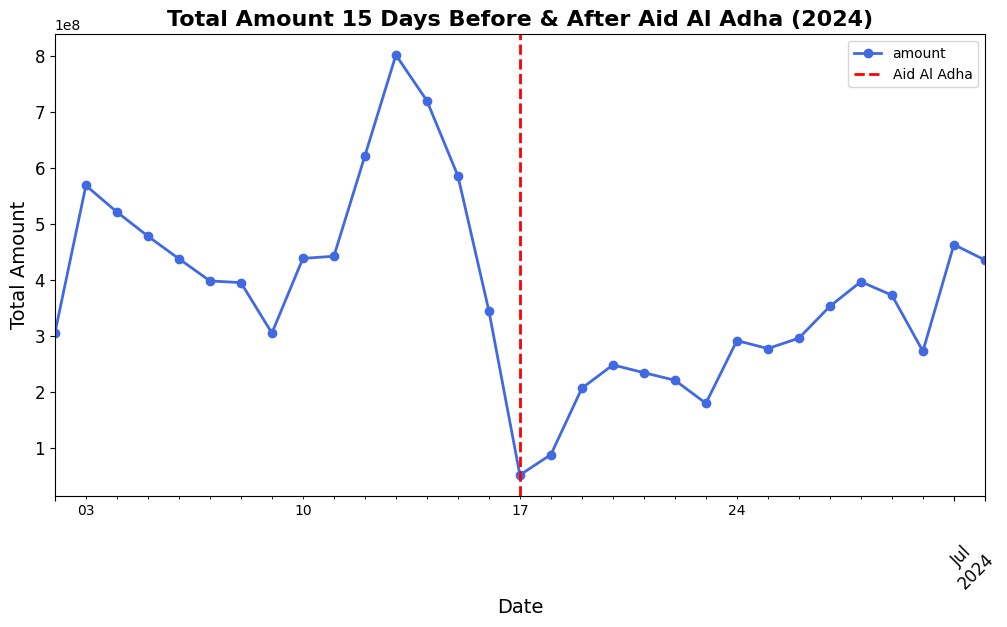

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
aid_al_adha_date = df[(df['day_off_description'].str.contains('aid al adha', case=False, na=False)) & 
                       (df.index.year == 2024)].index.unique()

if len(aid_al_adha_date) > 0:
    aid_al_adha_date = aid_al_adha_date[0]  
else:
    raise ValueError("No 'Aid Al Adha' found in the 2023 dataset.")


start_date = aid_al_adha_date - pd.Timedelta(days=15)
end_date = aid_al_adha_date + pd.Timedelta(days=15)
df_filtered = df.loc[start_date:end_date]

daily_amount = df_filtered.groupby(df_filtered.index)['amount'].sum()
plt.figure(figsize=(12,6))
daily_amount.plot(kind='line', marker='o', color='royalblue', linewidth=2)

plt.axvline(aid_al_adha_date, color='red', linestyle='--', linewidth=2, label='Aid Al Adha')
plt.title('Total Amount 15 Days Before & After Aid Al Adha (2024)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(False)  
plt.show()


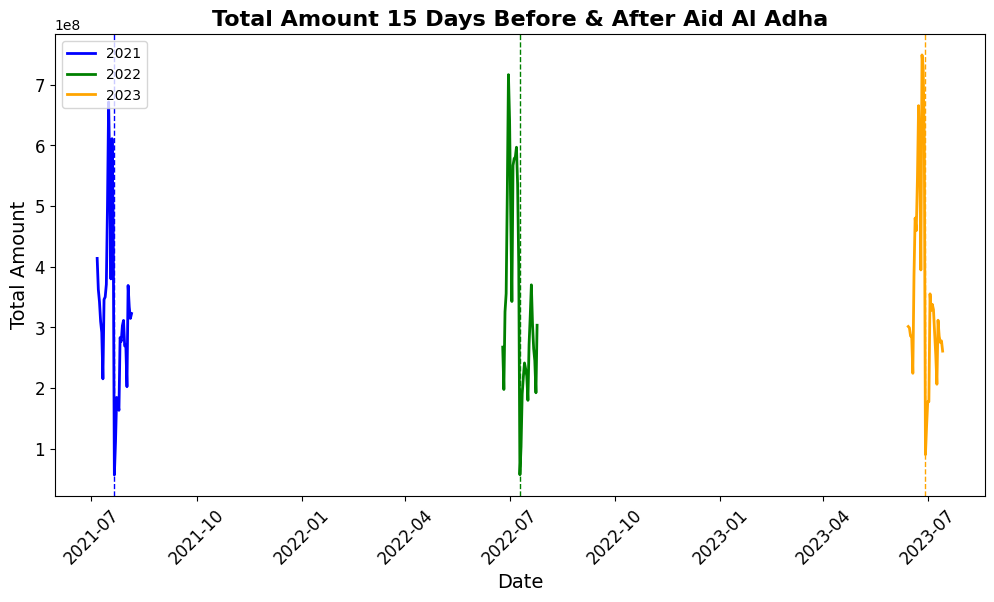

In [30]:
years_to_plot = [2021, 2022, 2023]
colors = ['blue', 'green', 'orange']

plt.figure(figsize=(12, 6))

for year, color in zip(years_to_plot, colors):
    aid_al_adha_date = df[(df['day_off_description'].str.contains('aid al adha', case=False, na=False)) & 
                           (df.index.year == year)].index.unique()
    if len(aid_al_adha_date) > 0:
        aid_al_adha_date = aid_al_adha_date[0]
    else:
        print(f"No 'Aid Al Adha' found in {year}. Skipping...")
        continue
    df = df.sort_index()
    start_date = aid_al_adha_date - pd.Timedelta(days=15)
    end_date = aid_al_adha_date + pd.Timedelta(days=15)
    df_filtered = df.loc[start_date:end_date]
    
    daily_amount = df_filtered.groupby(df_filtered.index)['amount'].sum()
    plt.plot(daily_amount.index, daily_amount.values, color=color, linewidth=2, label=f'{year}')
    plt.axvline(aid_al_adha_date, color=color, linestyle='--', linewidth=1)

plt.title('Total Amount 15 Days Before & After Aid Al Adha', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(False)
plt.show()



In [31]:
df.head()

,atm_id,amount,city,region,day_off_description,is_holiday
date,,,,,,
2009-01-02,1,17200.0,casablanca,casablanca-settat,normal day,0
2009-01-02,581,80600.0,fes,fes-meknes,normal day,0
2009-01-02,582,203000.0,taza,fes-meknes,normal day,0
2009-01-02,582,203000.0,taza,tanger-tetouan-al hoceima,normal day,0
2009-01-02,583,236800.0,azilal,beni mellal-khenifra,normal day,0


In [32]:
df.shape

(8929254, 6)

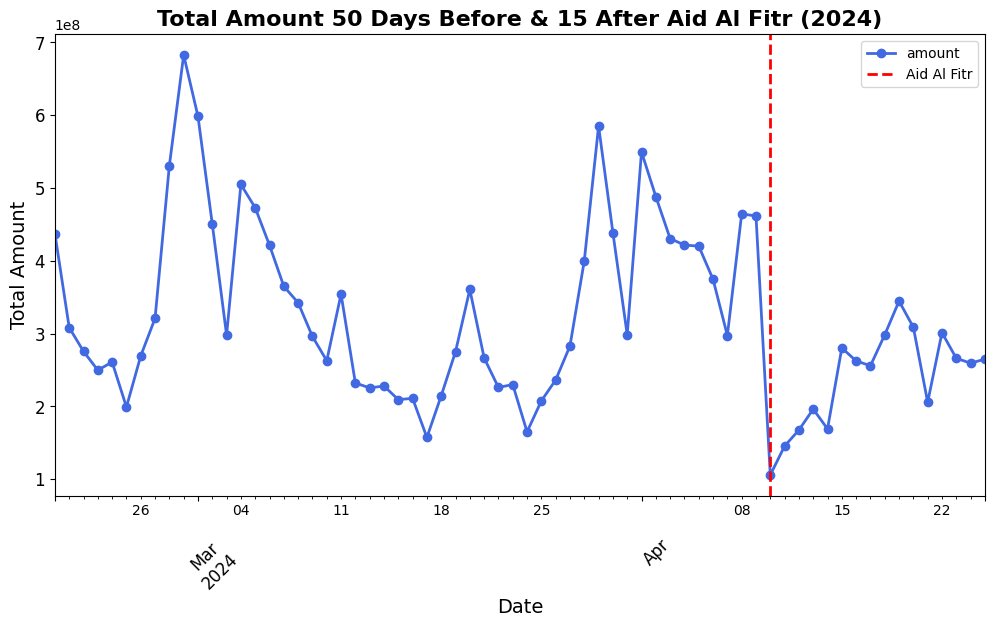

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
aid_al_fitre= df[(df['day_off_description'].str.contains('aid al fitr', case=False, na=False)) & 
                       (df.index.year == 2024)].index.unique()

if len(aid_al_fitre) > 0:
    aid_al_fitre = aid_al_fitre[0]  
else:
    raise ValueError("No 'Aid Al Fitr' found in the 2024 dataset.")


start_date = aid_al_fitre - pd.Timedelta(days=50)
end_date = aid_al_fitre + pd.Timedelta(days=15)
df_filtered = df.loc[start_date:end_date]

daily_amount = df_filtered.groupby(df_filtered.index)['amount'].sum()
plt.figure(figsize=(12,6))
daily_amount.plot(kind='line', marker='o', color='royalblue', linewidth=2)

plt.axvline(aid_al_fitre, color='red', linestyle='--', linewidth=2, label='Aid Al Fitr')
plt.title('Total Amount 50 Days Before & 15 After Aid Al Fitr (2024)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(False)  
plt.show()


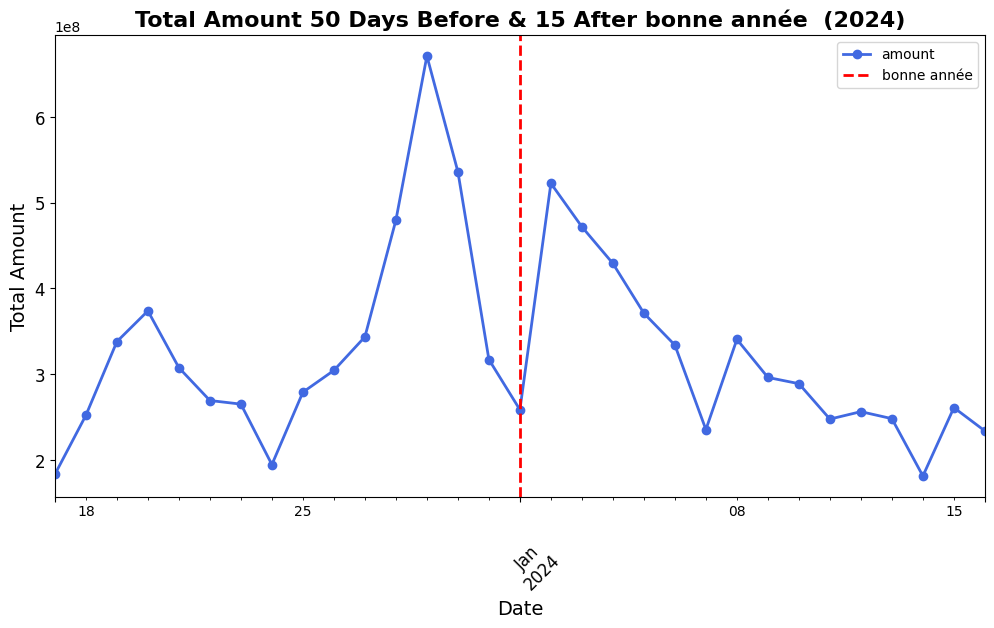

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
bonne_année= df[(df['day_off_description'].str.contains("jour de lan", case=False, na=False)) & 
                       (df.index.year == 2024)].index.unique()

if len(bonne_année) > 0:
    bonne_année = bonne_année[0]  
else:
    raise ValueError("No 'bonne année' found in the 2024 dataset.")


start_date = bonne_année - pd.Timedelta(days=15)
end_date = bonne_année + pd.Timedelta(days=15)
df_filtered = df.loc[start_date:end_date]

daily_amount = df_filtered.groupby(df_filtered.index)['amount'].sum()
plt.figure(figsize=(12,6))
daily_amount.plot(kind='line', marker='o', color='royalblue', linewidth=2)

plt.axvline(bonne_année, color='red', linestyle='--', linewidth=2, label='bonne année')
plt.title('Total Amount 50 Days Before & 15 After bonne année  (2024)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(False)  
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7240\3862874385.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(events))


No 'migrations  du db2 et du cics' found in 2024. Skipping...
No 'migration des agences chaouia' found in 2024. Skipping...
No 'migration z9 vers le z10' found in 2024. Skipping...


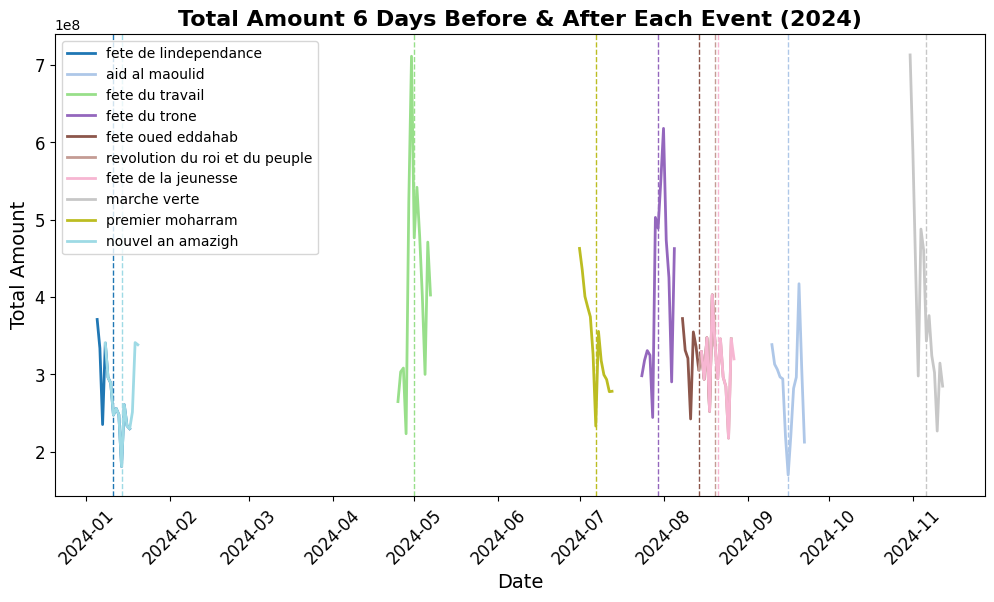

In [35]:
events = ['fete de lindependance', 'aid al maoulid',
       'migrations  du db2 et du cics', 'fete du travail',
       'migration des agences chaouia', 'fete du trone',
       'fete oued eddahab', 'revolution du roi et du peuple',
       'fete de la jeunesse', 'marche verte', 'premier moharram',
       'migration z9 vers le z10', 'nouvel an amazigh']
colors = plt.cm.get_cmap('tab20', len(events))

plt.figure(figsize=(12, 6))
for i, event in enumerate(events):
    event_date = df[(df['day_off_description'].str.contains(event, case=False, na=False)) & 
                    (df.index.year == 2024)].index.unique()
    
    if len(event_date) > 0:
        event_date = event_date[0]
    else:
        print(f"No '{event}' found in 2024. Skipping...")
        continue
    
    start_date = event_date - pd.Timedelta(days=6)
    end_date = event_date + pd.Timedelta(days=6)
    
    df = df.sort_index()
    df_filtered = df.loc[start_date:end_date]   
    daily_amount = df_filtered.groupby(df_filtered.index)['amount'].sum()
    plt.plot(daily_amount.index, daily_amount.values, 
             color=colors(i), linewidth=2, label=f'{event}')
    plt.axvline(event_date, color=colors(i), linestyle='--', linewidth=1)
plt.title('Total Amount 6 Days Before & After Each Event (2024)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(False)
plt.show()


In [36]:
filtered_events = df[
    (df['day_off_description'].str.contains("migrations du db2 et du cics", case=False, na=False) |
     df['day_off_description'].str.contains("migration des agences chaouia", case=False, na=False) |
     df['day_off_description'].str.contains("migration z9 vers le z10", case=False, na=False))
]

event_years = filtered_events.index.year.unique()
print("These events occurred in the following years:", event_years)




These events occurred in the following years: Index([2009, 2011], dtype='int32', name='date')


C:\Users\Hp\AppData\Local\Temp\ipykernel_7240\1985139712.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(events))


No 'migration z9 vers le z10' found in 2009. Skipping...


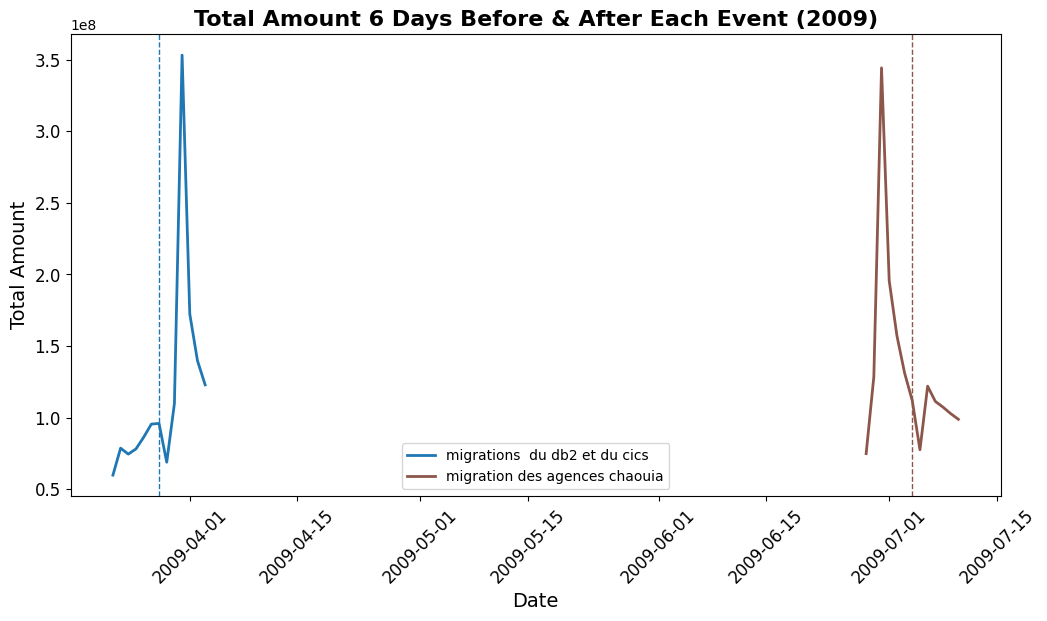

In [37]:
events = ['migrations  du db2 et du cics','migration des agences chaouia','migration z9 vers le z10']
colors = plt.cm.get_cmap('tab20', len(events))

plt.figure(figsize=(12, 6))
for i, event in enumerate(events):
    event_date = df[(df['day_off_description'].str.contains(event, case=False, na=False)) & 
                    (df.index.year == 2009)].index.unique()
    
    if len(event_date) > 0:
        event_date = event_date[0]
    else:
        print(f"No '{event}' found in 2009. Skipping...")
        continue
    start_date = event_date - pd.Timedelta(days=6)
    end_date = event_date + pd.Timedelta(days=6)
    
    df = df.sort_index()
    df_filtered = df.loc[start_date:end_date]   
    daily_amount = df_filtered.groupby(df_filtered.index)['amount'].sum()
    plt.plot(daily_amount.index, daily_amount.values, 
             color=colors(i), linewidth=2, label=f'{event}')
    plt.axvline(event_date, color=colors(i), linestyle='--', linewidth=1)
plt.title('Total Amount 6 Days Before & After Each Event (2009)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(False)
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_7240\438494652.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(events))


No 'migrations  du db2 et du cics' found in 2011. Skipping...
No 'migration des agences chaouia' found in 2011. Skipping...


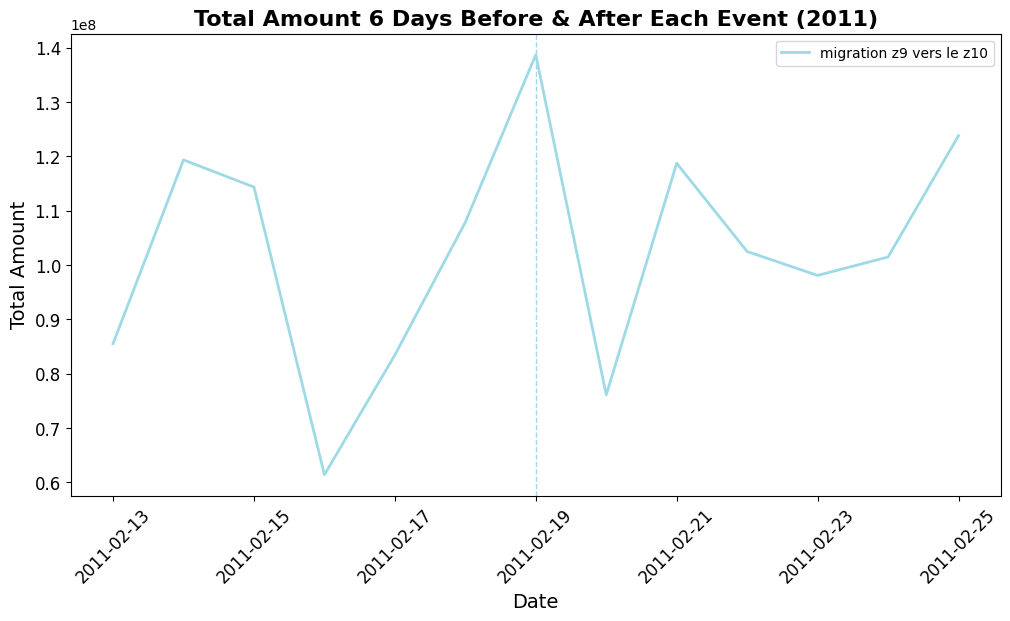

In [38]:
events = ['migrations  du db2 et du cics','migration des agences chaouia','migration z9 vers le z10']
colors = plt.cm.get_cmap('tab20', len(events))

plt.figure(figsize=(12, 6))
for i, event in enumerate(events):
    event_date = df[(df['day_off_description'].str.contains(event, case=False, na=False)) & 
                    (df.index.year == 2011)].index.unique()
    
    if len(event_date) > 0:
        event_date = event_date[0]
    else:
        print(f"No '{event}' found in 2011. Skipping...")
        continue
    start_date = event_date - pd.Timedelta(days=6)
    end_date = event_date + pd.Timedelta(days=6)
    
    df = df.sort_index()
    df_filtered = df.loc[start_date:end_date]   
    daily_amount = df_filtered.groupby(df_filtered.index)['amount'].sum()
    plt.plot(daily_amount.index, daily_amount.values, 
             color=colors(i), linewidth=2, label=f'{event}')
    plt.axvline(event_date, color=colors(i), linestyle='--', linewidth=1)
plt.title('Total Amount 6 Days Before & After Each Event (2011)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(False)
plt.show()


In [39]:
df['day_off_description'] = df['day_off_description'].replace({
    'migrations  du db2 et du cics': 'normal day',
    'migration z9 vers le z10': 'normal day',
    'migration des agences chaouia': 'normal day',
})

In [40]:
df['day_off_description'] = df['day_off_description'].replace({
    'aid al maouli': 'others',
    'fete du travail': 'others',
    'fete du trone': 'others',
    'fete de lindependance': 'others',
    'fete oued eddahab': 'others',
    'revolution du roi et du peuple': 'others',
    'fete de la jeunesse': 'others',
    'marche verte': 'others',
    'premier moharram': 'others'
})

In [41]:
df['dayofweek'] = df.index.dayofweek

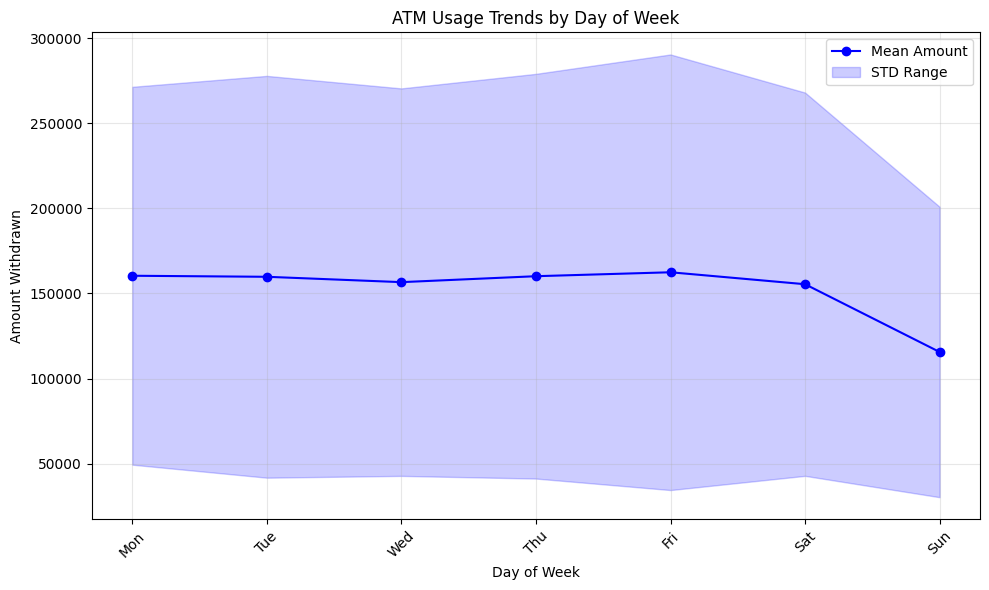

In [42]:
daily_trends = df.groupby('dayofweek').agg({
    'amount': ['mean', 'std', 'max', 'min']
}).reset_index()

daily_trends.columns = ['_'.join(col).strip() for col in daily_trends.columns.values]
plt.figure(figsize=(10, 6))
plt.plot(daily_trends['dayofweek_'], daily_trends['amount_mean'], marker='o', color='b', label='Mean Amount')
plt.fill_between(daily_trends['dayofweek_'], daily_trends['amount_mean'] - daily_trends['amount_std'],
                 daily_trends['amount_mean'] + daily_trends['amount_std'], color='blue', alpha=0.2, label='STD Range')

plt.xticks(daily_trends['dayofweek_'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.title('ATM Usage Trends by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Amount Withdrawn')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [43]:
df['dayofmonth'] = df.index.day

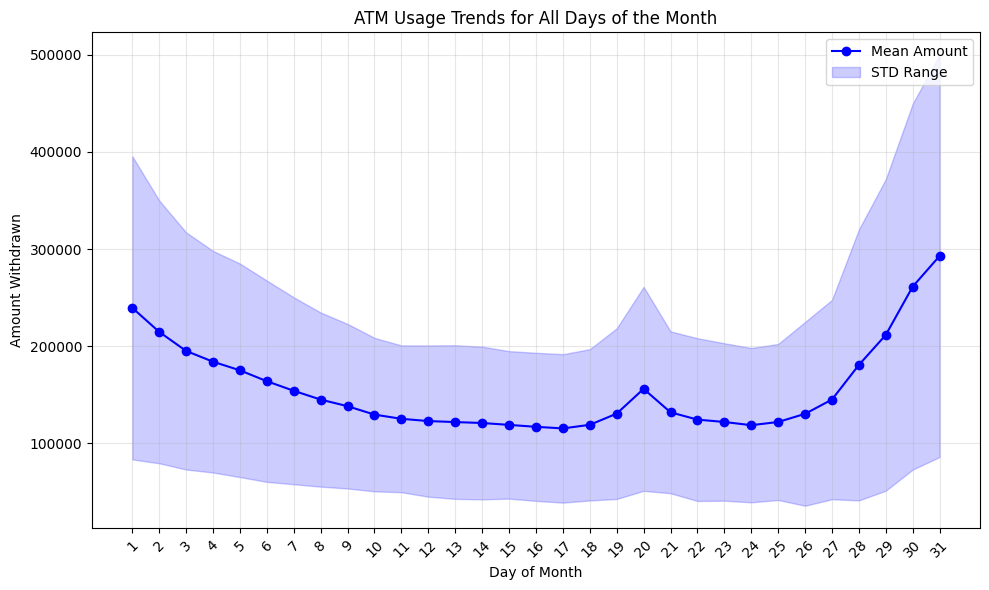

In [44]:

daily_trends = df.groupby('dayofmonth').agg({
    'amount': ['mean', 'std', 'max', 'min']
}).reset_index()

daily_trends.columns = ['_'.join(col).strip() for col in daily_trends.columns.values]
plt.figure(figsize=(10, 6))
plt.plot(daily_trends['dayofmonth_'], daily_trends['amount_mean'], marker='o', color='b', label='Mean Amount')
plt.fill_between(daily_trends['dayofmonth_'], daily_trends['amount_mean'] - daily_trends['amount_std'],
                 daily_trends['amount_mean'] + daily_trends['amount_std'], color='blue', alpha=0.2, label='STD Range')
plt.xticks(daily_trends['dayofmonth_'], daily_trends['dayofmonth_'], rotation=45)

plt.title('ATM Usage Trends for All Days of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Amount Withdrawn')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
df['monthoftheyear'] = df.index.month

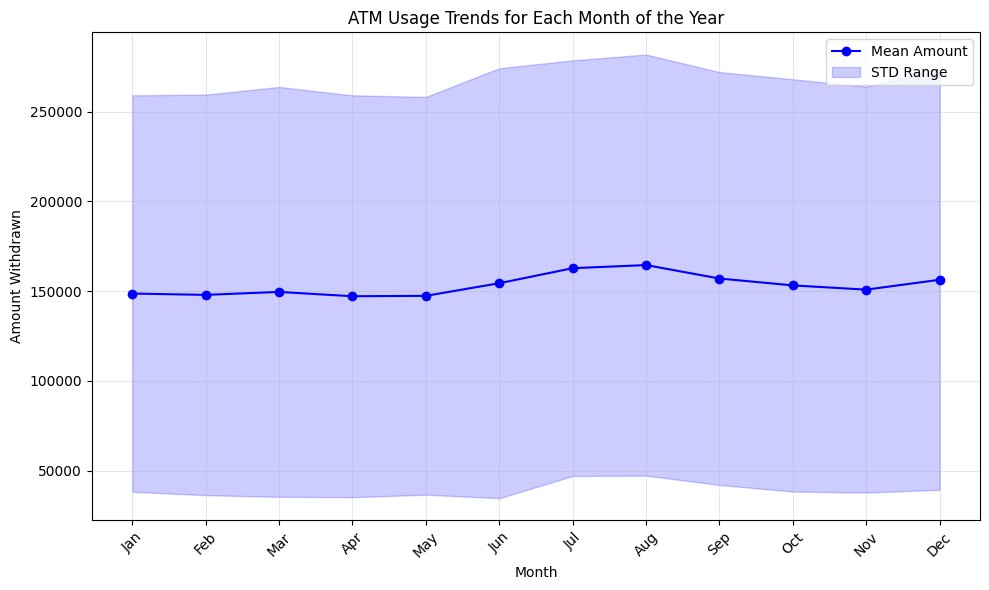

In [46]:
monthly_trends = df.groupby('monthoftheyear').agg({
    'amount': ['mean', 'std', 'max', 'min']
}).reset_index()
monthly_trends.columns = ['_'.join(col).strip() for col in monthly_trends.columns.values]

plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['monthoftheyear_'], monthly_trends['amount_mean'], marker='o', color='b', label='Mean Amount')
plt.fill_between(monthly_trends['monthoftheyear_'], monthly_trends['amount_mean'] - monthly_trends['amount_std'],
                 monthly_trends['amount_mean'] + monthly_trends['amount_std'], color='blue', alpha=0.2, label='STD Range')

plt.xticks(monthly_trends['monthoftheyear_'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.title('ATM Usage Trends for Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Amount Withdrawn')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
df.head()

,atm_id,amount,city,region,day_off_description,is_holiday,dayofweek,dayofmonth,monthoftheyear
date,,,,,,,,,
2009-01-02,1,17200.0,casablanca,casablanca-settat,normal day,0,4,2,1
2009-01-02,581,80600.0,fes,fes-meknes,normal day,0,4,2,1
2009-01-02,582,203000.0,taza,fes-meknes,normal day,0,4,2,1
2009-01-02,582,203000.0,taza,tanger-tetouan-al hoceima,normal day,0,4,2,1
2009-01-02,583,236800.0,azilal,beni mellal-khenifra,normal day,0,4,2,1


In [48]:
def add_date_features(df):  
    df['weekend_type'] = np.where(df.index.dayofweek == 4, 'pre weekend',
                              np.where(df.index.dayofweek == 5, 'weekend', 'workday'))
    salary_days = [26, 27, 28, 29, 30, 31, 1, 2, 3]
    df['is_salary_day'] = np.where(np.isin(df.index.day, salary_days), 1, 0) 
    return df

In [49]:
df = add_date_features(df)

In [50]:
df['season'] = np.select(
    [
        df.index.month.isin([12, 1, 2]), 
        df.index.month.isin([3, 4, 5]),   
        df.index.month.isin([6, 7, 8]),   
        df.index.month.isin([9, 10, 11])  
    ],
    ['winter', 'spring', 'summer', 'fall'], 
)


In [63]:
def add_days_after_last_holiday(df):
    result_df = df.copy()

    result_df = result_df.sort_index()

    if sum(result_df['is_holiday'] == 1) == 0:
        print("No holidays found in the dataset")
        result_df['days_after_last_holiday'] = np.nan
        return result_df
    if not pd.api.types.is_datetime64_dtype(result_df.index):
        result_df.index = pd.to_datetime(result_df.index)
    result_df['days_after_last_holiday'] = np.nan
    
    last_holiday = None
    for date in result_df.index:
        is_holiday_val = result_df.loc[date, 'is_holiday']
        if isinstance(is_holiday_val, pd.Series):
            is_holiday_val = is_holiday_val.iloc[0]
            
        if is_holiday_val == 1:
            last_holiday = date
        if last_holiday is not None:
            delta = date - last_holiday
            result_df.loc[date, 'days_after_last_holiday'] = delta.days
    
    return result_df

In [64]:
df = add_days_after_last_holiday(df)

In [71]:
df[df['days_after_last_holiday'].isnull()].index

DatetimeIndex(['2009-01-02', '2009-01-02', '2009-01-02', '2009-01-02',
               '2009-01-02', '2009-01-02', '2009-01-02', '2009-01-02',
               '2009-01-02', '2009-01-02',
               ...
               '2009-01-10', '2009-01-10', '2009-01-10', '2009-01-10',
               '2009-01-10', '2009-01-10', '2009-01-10', '2009-01-10',
               '2009-01-10', '2009-01-10'],
              dtype='datetime64[ns]', name='date', length=7044, freq=None)

In [72]:
def fill_initial_nans(df):
    nan_mask = df['days_after_last_holiday'].isna()
    first_valid_date = df.index[nan_mask][0] 
    reference_holiday = pd.Timestamp("2009-01-01")
    df.loc[nan_mask, 'days_after_last_holiday'] = (df.index[nan_mask] - reference_holiday).days

    return df

In [ ]:
df=fill_initial_nans(df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True, color='skyblue')
plt.title('Distribution of Amount with Density Curve')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True, color='skyblue')
plt.title('Distribution of Amount with Density Curve')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import numpy as np
df['sin_day'] = np.sin(2 * np.pi * df['dayofyear'] / 365.25)
df['cos_day'] = np.cos(2 * np.pi * df['dayofyear'] / 365.25)

In [ ]:
import numpy as np

def add_days_until_next_holiday_chunked(df, chunk_size=250000):
    holiday_dates = df[df['is_holiday'] == 1].index.unique().sort_values()
    chunks = [df.iloc[i:i + chunk_size] for i in range(0, len(df), chunk_size)]
    processed_chunks = []

    for chunk in chunks:
        chunk['days_until_next_holiday'] = [
            (holiday_dates[holiday_dates > date][0] - date).days
            if np.any(holiday_dates > date) else -1
            for date in chunk.index
        ]
        processed_chunks.append(chunk)

    return pd.concat(processed_chunks)

df = add_days_until_next_holiday_chunked(df)

In [ ]:
windows = [7,14,30]
        
for window in windows:
    df[f'amount_mean_{window}'] = df['amount'].rolling(window=window).mean()
    df[f'amount_std_{window}'] = df['amount'].rolling(window=window).std()
    df[f'amount_max_{window}'] = df['amount'].rolling(window=window).max()
    df[f'amount_min_{window}'] = df['amount'].rolling(window=window).min()       
df[f'amount_ewm'] = df['amount'].ewm(span=14).mean()

In [ ]:
import pandas as pd
aid_al_adha_dates = df[df['day_off_description'] == 'aid al adha'].index.unique()
aid_al_fitr_dates = df[df['day_off_description'] == 'aid al fitr'].index.unique()
year_end_dates =df.index[df.index.month == 12].unique()

ramadan_start_dates = aid_al_fitr_dates - pd.Timedelta(days=30)
def days_before_holiday(date, holiday_dates):
    future_holidays = [d for d in holiday_dates if d > date]
    return (future_holidays[0] - date).days if future_holidays else 365  

df['days_before_aid_adha'] = df.index.map(lambda date: days_before_holiday(date, aid_al_adha_dates))
df['days_before_aid_fitr'] = df.index.map(lambda date: days_before_holiday(date, aid_al_fitr_dates))
df['days_before_ramadan'] = df.index.map(lambda date: days_before_holiday(date, ramadan_start_dates))
df['days_before_year_ends'] =df.index.map(lambda date: days_before_holiday(date, year_end_dates))

In [74]:
df.head()

,atm_id,amount,city,region,day_off_description,is_holiday,dayofweek,dayofmonth,monthoftheyear,weekend_type,is_salary_day,summer_holiday,season,days_after_last_holiday
date,,,,,,,,,,,,,,
2009-01-02,1,17200.0,casablanca,casablanca-settat,normal day,0,4,2,1,pre weekend,1,0,winter,1.0
2009-01-02,581,80600.0,fes,fes-meknes,normal day,0,4,2,1,pre weekend,1,0,winter,1.0
2009-01-02,582,203000.0,taza,fes-meknes,normal day,0,4,2,1,pre weekend,1,0,winter,1.0
2009-01-02,582,203000.0,taza,tanger-tetouan-al hoceima,normal day,0,4,2,1,pre weekend,1,0,winter,1.0
2009-01-02,583,236800.0,azilal,beni mellal-khenifra,normal day,0,4,2,1,pre weekend,1,0,winter,1.0


In [ ]:
df.to_csv('atm_data_after_fa.csv')